Image dimensions: (1200, 1920, 3)


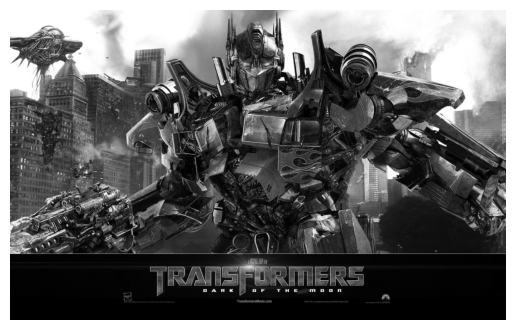

In [1]:
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
img = mpimg.imread('optimumprime.jpg')
print('Image dimensions:', img.shape)
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
gray = rgb2gray(img)
plt.imshow(gray, cmap=plt.get_cmap('gray'))
plt.axis('off')  
plt.show()

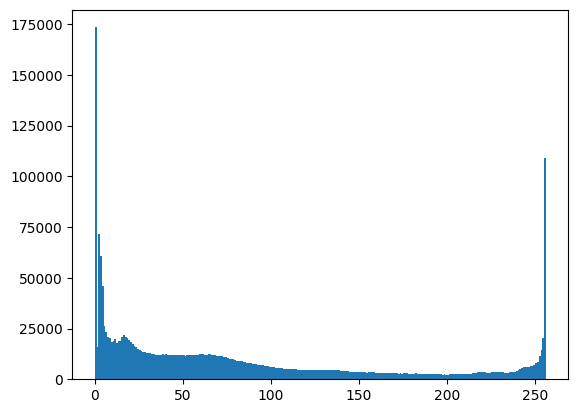

In [2]:
import cv2
from matplotlib import pyplot as plt
image = cv2.imread('optimumprime.jpg',cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([image],[0],None,[256],[0,256])
cv2.imshow('Image', image)
plt.hist(image.ravel(), bins=256, range=(0, 256))
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

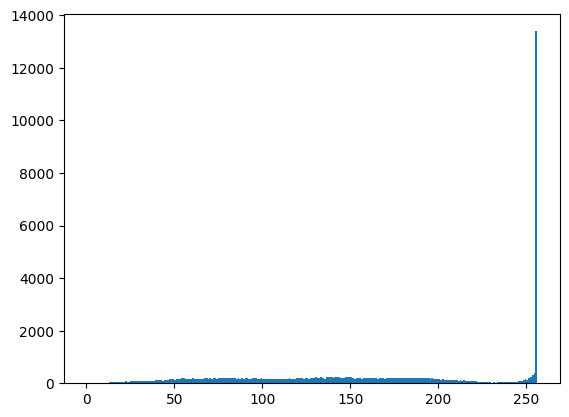

In [3]:
import cv2
from matplotlib import pyplot as plt
image = cv2.imread('cat.jpeg',cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([image],[0],None,[256],[0,256])
cv2.imshow('Image', image)
plt.hist(image.ravel(), bins=256, range=(0, 256))
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

<BarContainer object of 256 artists>

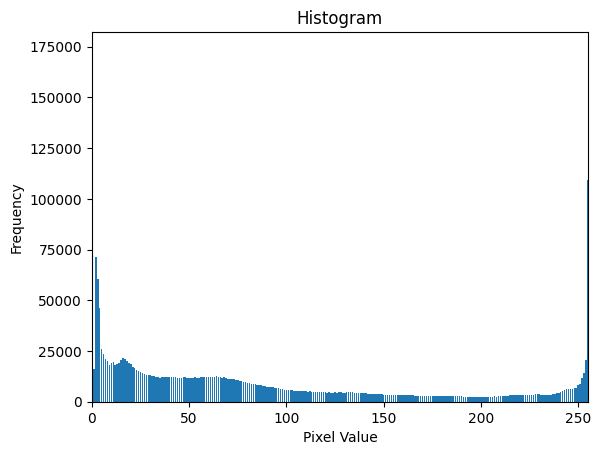

In [ ]:
import cv2
from matplotlib import pyplot as plt
image = cv2.imread('optimumprime.jpg',cv2.IMREAD_GRAYSCALE)
histogram = [0] * 256
for row in image:
    for pixel in row:
        histogram[pixel] += 1
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.xlim([0, 255])
plt.bar(range(0,256),histogram)


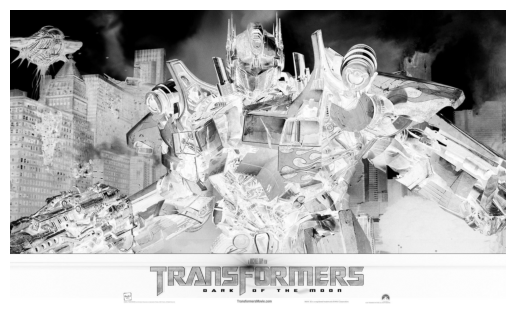

<BarContainer object of 256 artists>

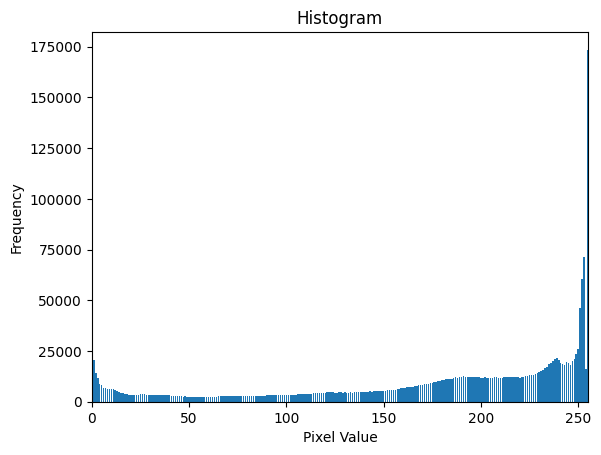

In [13]:
import cv2
from matplotlib import pyplot as plt
image = cv2.imread('optimumprime.jpg',cv2.IMREAD_GRAYSCALE)
negative = 255 - image
histogram = [0] * 256
for row in negative:
    for pixel in row:
        histogram[pixel] += 1
plt.imshow(negative, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.xlim([0, 255])
plt.bar(range(0,256),histogram)

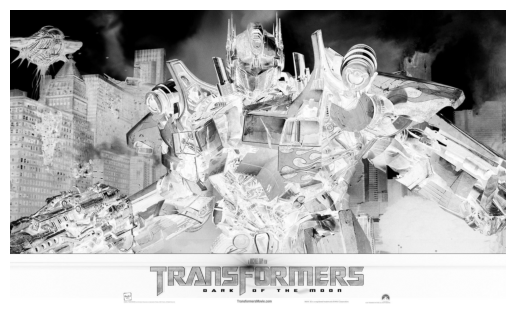

In [ ]:
import cv2
from matplotlib import pyplot as plt
image = cv2.imread('optimumprime.jpg',cv2.IMREAD_GRAYSCALE)
height, width = image.shape

#Negative image
def T(r):
    s = 255 - r
    return s
for i in range(height):
    for j in range(width):
        image[i][j] = T(image[i][j])
plt.imshow(image, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

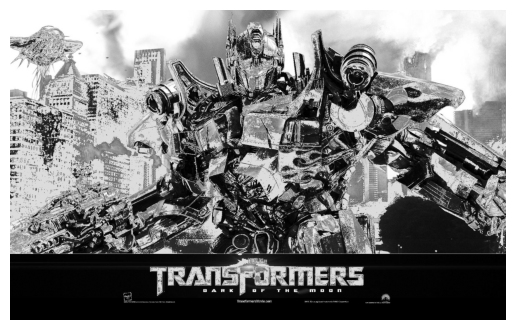

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
image = cv2.imread('optimumprime.jpg',cv2.IMREAD_GRAYSCALE)
#Gray level slicing
def T(r):
    if 50 <= r <= 100:
        r = 220
    return r

height, width = image.shape
for i in range(height):
    for j in range(width):
        image[i][j] = T(image[i][j])

plt.imshow(image, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()